In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [5]:
#adding lables to this categorical variable 
def lables(edu):
    if edu == 1:
        return "Undergrad"
    elif edu==2:
        return "Graduate"
    else:
        return "Masters"    

In [6]:
df['Education_lables']=df['Education'].apply(lables)

In [7]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_lables
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Undergrad
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Undergrad
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Undergrad
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Graduate
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Graduate


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIP Code'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

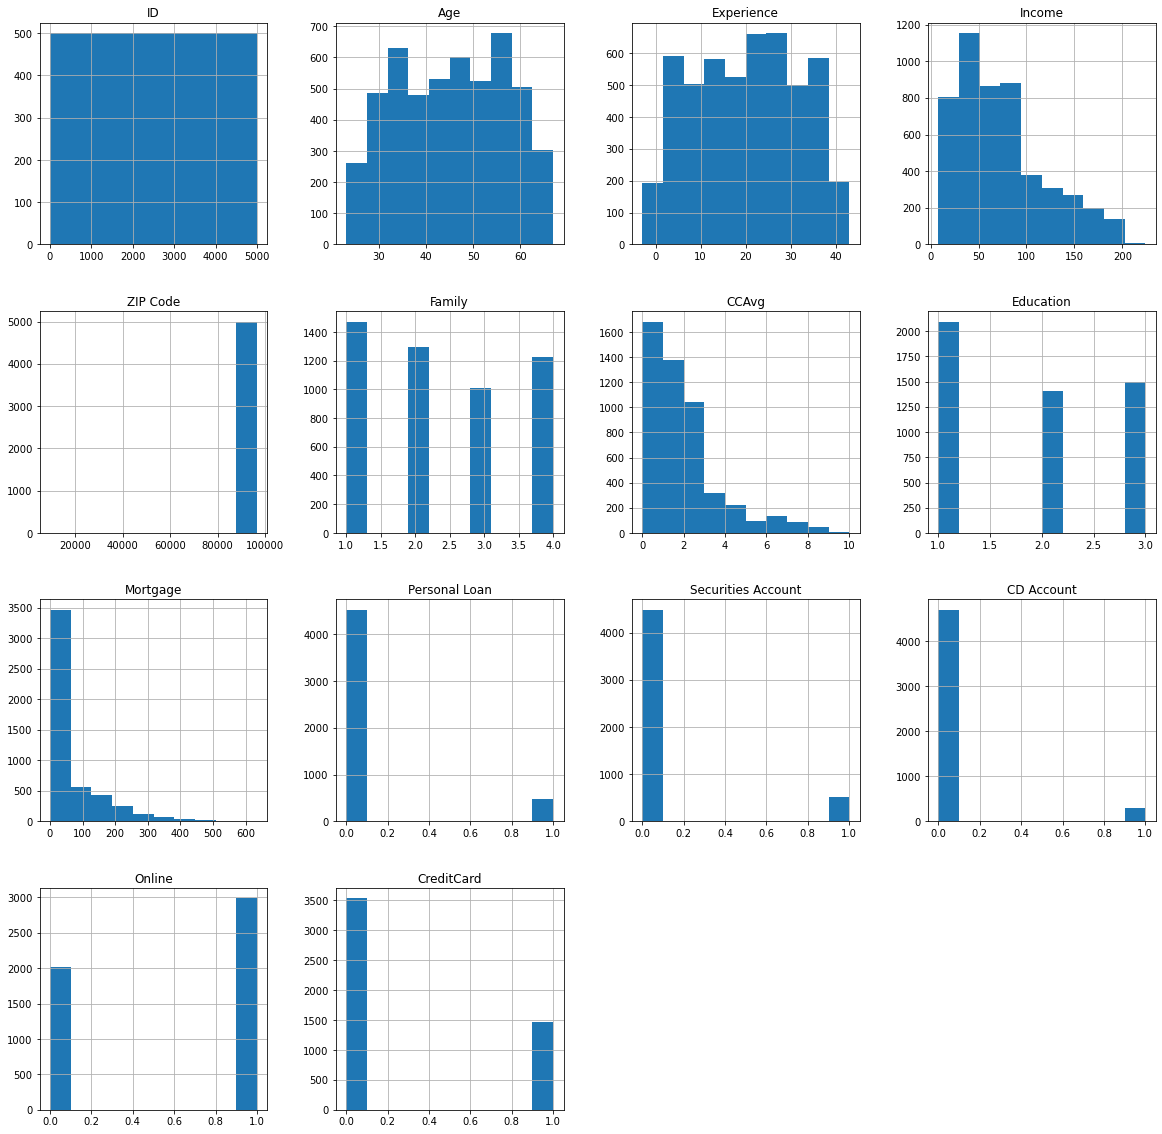

In [8]:
df.hist(figsize=(20,20))

In [9]:
# FINDINGS
# As we can see ID and zipcode are of no use for our analysis we can drop them
# Majority of customers use Online banking, approx 60% of them
# very few pepole take personal loan
# There few negetive values for Experience which doesn't look good

In [10]:
df.drop(['ID','ZIP Code'], axis=1, inplace=True)
neg_exp=df[df['Experience']<0]

In [11]:
neg_exp.shape

(52, 13)

In [12]:
neg_exp['Experience'].unique()

array([-1, -2, -3], dtype=int64)

In [13]:
#we can drop these rows as these constituet around 1% of whole dataset
df.drop(df[df['Experience']<0].index, axis=0,inplace=True)
df['Experience'].min()

0

<AxesSubplot:>

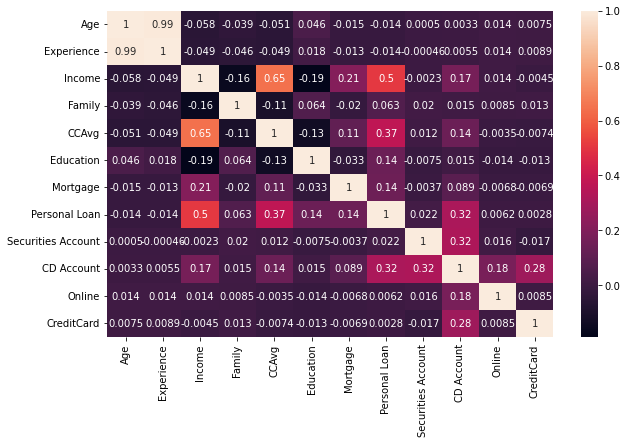

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [15]:
# Only Age and Experience are highly correlated 
# Income and Personal loan are moderately correlated

In [26]:
edu_count=df['Education_lables'].value_counts()
edu_count

Undergrad    2080
Masters      1481
Graduate     1387
Name: Education_lables, dtype: int64

In [27]:
fig=px.pie(df,values=edu_count, names=edu_count.index, title='Customers break down by Education')
fig.show()

In [19]:
# exploring account holders distribution

In [20]:
def Security_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return 'Holds Securites & Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
        return 'Does not Holds Securites or Deposit'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return ' Holds only Securites '
    elif (row['Securities Account']==0) & (row['CD Account']==1):
        return ' Holds only Deposit'

In [21]:
df['Account_holder_cat']=df.apply(Security_CD,axis=1)

In [22]:
counts=df['Account_holder_cat'].value_counts()

In [28]:
fig=px.pie(df,values=counts,names=counts.index, title='Account holders breakdown')
fig.show()

In [ ]:
# 86% of the given population doesn't hold any account. 

In [ ]:
# comparing income and educations levels who take loans vs who doesn't.

In [30]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_lables', 'Account_holder_cat'],
      dtype='object')

In [35]:
fig=px.box(df,x='Education_lables',y='Income',facet_col='Personal Loan')
fig.show()

In [36]:
# can infer that income of cutomers who take loan is same irrespective of their education levels.
# but we can say that graduate or masters degree holders with higher incomes take PL compared to similar education levels with
# lower income levels

In [37]:
fig=px.box(df,x='Personal Loan', y='Income',title='Income Levels')
fig.show()

In [38]:
# Majority of the customers who take PL have higher Income levels compared to who doesn't.

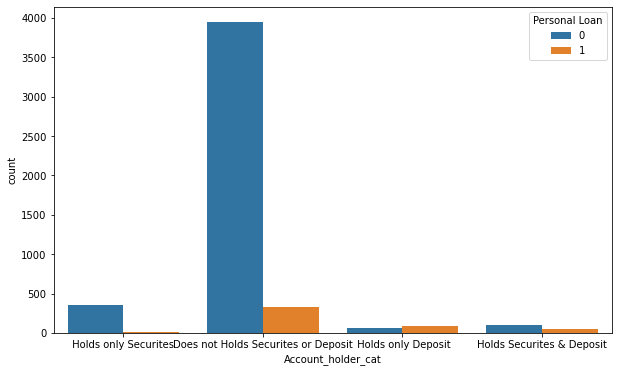

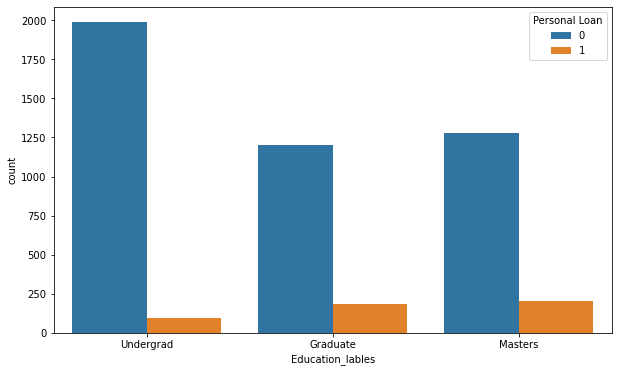

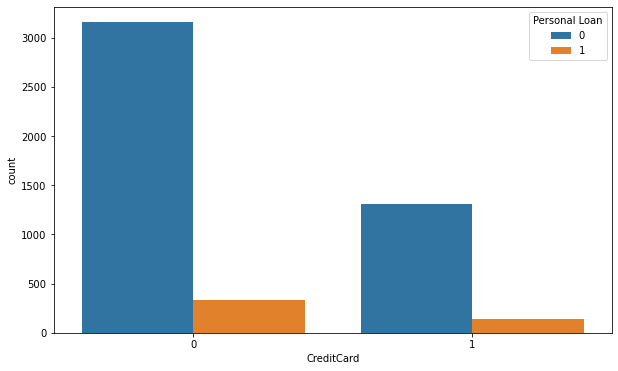

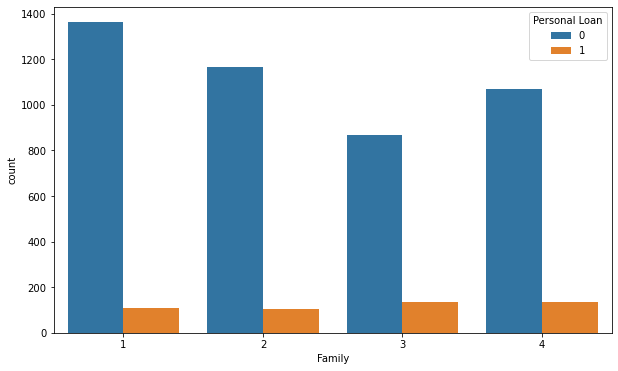

In [51]:
for i in ['Account_holder_cat','Education_lables','CreditCard','Family']:
    plt.figure(figsize=(10,6))
    sns.countplot(x=i,hue='Personal Loan',data=df)

In [ ]:
# INFERENCES
# customers who doesn't hold securities or CD accounts and who hold only deposite account take more loans.
# Graduate and Master degree holders take more PL's than Undergrad's.
# Non credit card holders take PL's than card holders.
# Taking PL is quite similar accross all family member categories.
# not really sure but still, given the family with 3 members probability of taking PL is higher compared to others.

In [ ]:
# we'll try to test hypothesis for effect of Age of customers on taking PL.

In [56]:
Age_no=np.array(df[df['Personal Loan']==0]['Age'])
Age_yes=np.array(df[df['Personal Loan']==1]['Age'])

In [57]:
# using T-test t test the hypothesis, as we are going to compare their means
# H0 - Age doesn't have impact on taking PL. i.e Mean of two samples is same
# H1 - Age have impact on taking PL. i.e Means are different

In [58]:
import scipy.stats as stats

In [59]:
t_score,p_value=stats.ttest_ind(a=Age_no,b=Age_yes,axis=0)
print(t_score)
print(p_value)

0.999006010107271
0.3178406512293751


In [ ]:
# P value is 0.317>0.05 Hence failed to reject H0

In [60]:
def hypo_test(col):
    no=np.array(df[df['Personal Loan']==0][col])
    yes=np.array(df[df['Personal Loan']==1][col])
    t_score,p_value=stats.ttest_ind(a=no,b=yes,axis=0)
    print('T score=',t_score)
    print('P value=',p_value)

In [61]:
hypo_test('Experience')

T score= 0.9931845596425513
P value= 0.3206686069622681


In [62]:
hypo_test('Income')

T score= -41.063483188763385
P value= 0.0


In [ ]:
# As P value is 0.00, rejecting H0
# income has a impact on taking loan.
# Correlation coef for income and Pl is 0.5